In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\archive\Superstore.csv",encoding='latin1')

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
#strategies to drive revenue
#sales and profit
#which product has most sales
#which products are most profitable
#which cities make most sales
#which segment is most profitable
#which ship mode is prevalent 



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [36]:
#which product is most profitable

best_category = df.groupby('Category')[['Profit', 'Discount', 'Quantity', 'Sales']].sum()
best_category = pd.DataFrame(best_category)
best_category

,Profit,Discount,Quantity,Sales
Category,,,,
Furniture,18451.2728,368.89,8028,741999.7953
Office Supplies,122490.8008,947.80,22906,719047.0320
Technology,145454.9481,244.40,6939,836154.0330


In [62]:
px.bar(best_category, y='Profit', color='Sales', title='Best performing category')

In [ ]:
best_products = df.groupby('Category')[['Profit', 'Discount', 'Quantity', 'Sales']].sum()
best_category = pd.DataFrame(best_category)
best_category

In [55]:
popular_products = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False).head(10)
popular_products

,Sales,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7753.0390
Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836
Canon PC1060 Personal Laser Copier,11619.834,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4094.9766
Ativa V4110MDD Micro-Cut Shredder,7699.890,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,9367.290,3696.2820
Ibico EPK-21 Electric Binding System,15875.916,3345.2823


In [59]:
sellin_cities = df.groupby('City')[['Profit', 'Discount', 'Quantity', 'Sales']].sum().sort_values('Profit', ascending=False).head(10)
sellin_cities

,Profit,Discount,Quantity,Sales
City,,,,
New York City,62036.9837,51.4,3417,256368.161
Los Angeles,30440.7579,55.5,2879,175851.341
Seattle,29156.0967,27.8,1590,119540.742
San Francisco,17507.3854,34.0,1935,112669.092
Detroit,13181.7908,0.8,441,42446.944
Lafayette,10018.3876,0.0,104,25036.200
Jackson,7581.6828,2.5,318,24963.858
Atlanta,6993.6629,0.0,156,17197.840
Minneapolis,6824.5846,0.0,80,16870.540


In [63]:
px.bar(sellin_cities, y='Profit', color='Sales', title='Best performing city')

In [64]:
best_segment = df.groupby('Segment')[['Profit', 'Discount', 'Quantity', 'Sales']].sum().sort_values('Profit', ascending=False).head(10)
best_segment

,Profit,Discount,Quantity,Sales
Segment,,,,
Consumer,134119.2092,820.91,19521,1.161401e+06
Corporate,91979.1340,477.85,11608,7.061464e+05
Home Office,60298.6785,262.33,6744,4.296531e+05


In [65]:
px.bar(best_segment, y='Profit', color='Sales', title='Best performing segment')

In [66]:
best_region = df.groupby('Region')[['Profit', 'Discount', 'Quantity', 'Sales']].sum().sort_values('Profit', ascending=False).head(10)
best_region

,Profit,Discount,Quantity,Sales
Region,,,,
West,108418.4489,350.20,12266,725457.8245
East,91522.7800,414.00,10618,678781.2400
South,46749.4303,238.55,6209,391721.9050
Central,39706.3625,558.34,8780,501239.8908


In [67]:
px.bar(best_region, y='Profit', color='Sales', title='Best performing region')

In [70]:
df.corr(numeric_only=True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_16884\58359773.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

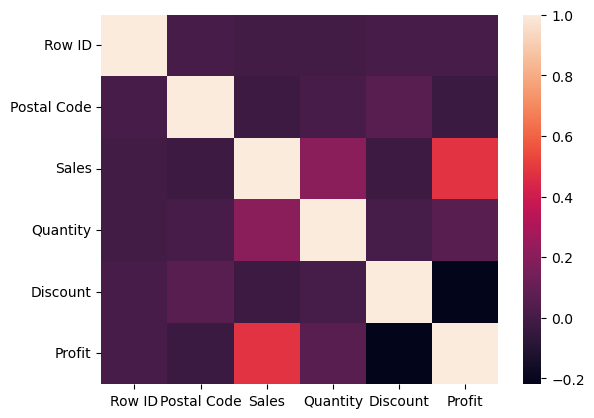

In [71]:
sns.heatmap(df.corr())

In [72]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [73]:
df['Order Month'] = df['Order Date'].dt.month

In [78]:
monthly_performance = df.groupby('Order Month')[['Profit', 'Discount', 'Quantity', 'Sales']].sum()
monthly_performance
#px.line(df, )

,Profit,Discount,Quantity,Sales
Order Month,,,,
1,9134.4461,57.12,1475,94924.8356
2,10294.6107,43.87,1067,59751.2514
3,28594.6872,107.90,2564,205005.4888
4,11587.4363,108.97,2447,137762.1286
5,22411.3078,121.59,2791,155028.8117
6,21285.7954,116.74,2680,152718.6793
7,13832.6648,112.10,2705,147238.0970
8,21776.9384,108.89,2784,159044.0630
9,36857.4753,206.06,5062,307649.9457


In [80]:
px.line(monthly_performance, y=['Profit', 'Sales'],title='Monthly performance')